# 타이타닉 데이터 EDA

## 목적
> 타이타닉호 탑승자의 연령대별 특징을 살펴보고 연령대가 생존 확률에 끼치는 영향이 있는지 살펴본다.

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## 결측치 파악
age(263), cabin(1014), boat(1188), body(1188), home.dest(564)  
나이, 객실정보, 탈출보트번호, 시신일련번호, 고향

>나이정보를 기존 데이터로 파악할 수 없나?
- 동일 티켓을 가진 가족, 지인의 나이로 대략적인 추측은 가능하나 정확도가 떨어짐

>객실정보는 등급으로 확인할 수 없나?  
- 알파벳 순서에 따른 등급별 객실정보가 어느정도의 구분점은 보이나 명확히 구분되어있다 할 수 없음
- 객실 정보는 현 EDA 과정에서 중요 컬럼이 아님

> boat, body의 경우 결측값 발생이 당연함, home 데이터는 불필요

[기타]
>모든 생존자는 boat 번호가 부여되어 있는가?
- 생존자 500명 중 23명은 보트 번호 정보가 없음
```python
df[df['survived'] == 1]['boat'].isna().sum() # 23
len(df[df['survived'] == 1]) # 500
```

>수습되지 않은 시신은 몇 구인가?
- 사망자 중 688명의 시신이 수습되지 못했거나 정보 누락 되었음
```python
df[df['survived'] == 0]['body'].isna().sum() # 688
```

결측치에 대한 전처리가 불가능 또는 불필요함

In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 로딩 및 확인
df = pd.read_csv('titanic.csv')

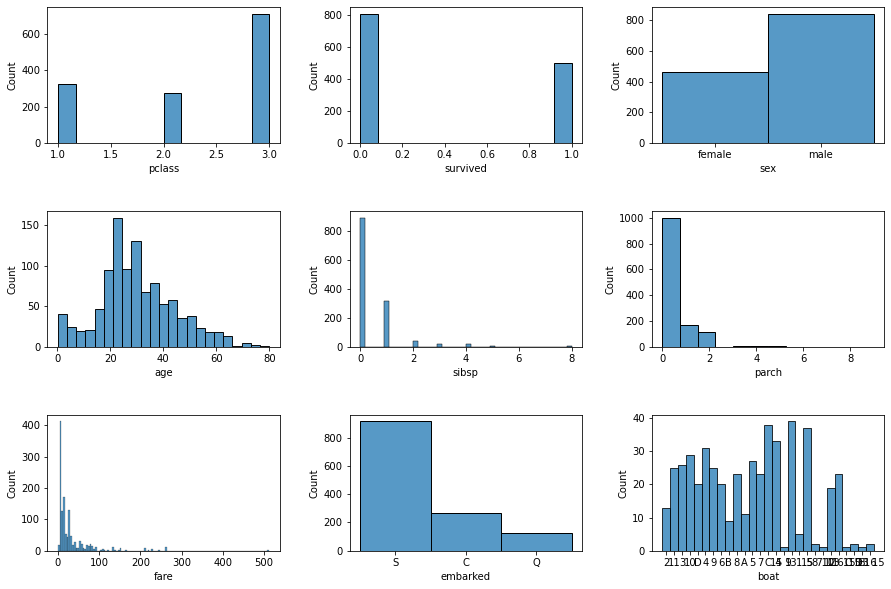

In [3]:
# feature별 히스토그램을 통해 이상값 확인하기
def hist_plt(df):
    fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10)) # 그래프 틀 생성
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

    idx, col = 0, 0
    for i, feat in enumerate(df.columns):
        sns.histplot(df[feat], ax=ax[idx, col])
        col += 1
        if (i+1) % 3 == 0:
            idx += 1
        if col == 3:
            col = 0

    plt.show()

# 'name', 'ticket', 'cabin', 'home.dest' 는 분류가 너무 다양하므로 제외
# 'body'는 일련번호이므로 제외
hist_plt(df[['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'boat']])

## 데이터 확인

In [4]:
df.head(6)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"


위 데이터를 통해 `티켓명((ticket)`을 확인해보면 같은 이름의 티켓이 같은 가격으로 책정된 것을 확인할 수 있다.

In [5]:
# 티켓명 기준으로 정렬
df.sort_values('ticket').head(8)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
67,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.50,B77,S,8,NaN,"London, England"
245,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.50,B77,S,8,NaN,"London Vancouver, BC"
195,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.50,B79,S,8,NaN,NaN
289,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S,8,NaN,"New York, NY"
291,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S,8,NaN,"New York, NY"
290,1,0,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S,NaN,NaN,"New York, NY"
232,1,0,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.00,C110,S,NaN,207.0,"Worcester, MA"
74,1,0,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.00,A14,S,NaN,NaN,"Stoughton, MA"


티켓명 기준으로 정렬한 결과 110152와 110413 티켓은 3명, 110465는 2명의 데이터에 포함되어 있다.  
세 종류의 티켓 모두 1등석 티켓에 해당하지만 전자의 두 티켓과 후자의 티켓에서 20 이상의 가격 차이가 있는 것을 확인할 수 있다.  

- 가격이 86.50인 1등석 티켓(110152)이 3장 존재하므로 3으로 나누면 28.8  
- 가격이 52인 1등석 티켓(110465)이 2장 존재하므로 2로 나누면 26

> 현재 보여지는 운임 비용은 인당 가격이 아닌 구성원 전체가 포함된 운임 비용임을 의심해 볼 수 있다.

### 객실별 평균 요금 및 분포 비교

<AxesSubplot:xlabel='pclass', ylabel='fare'>

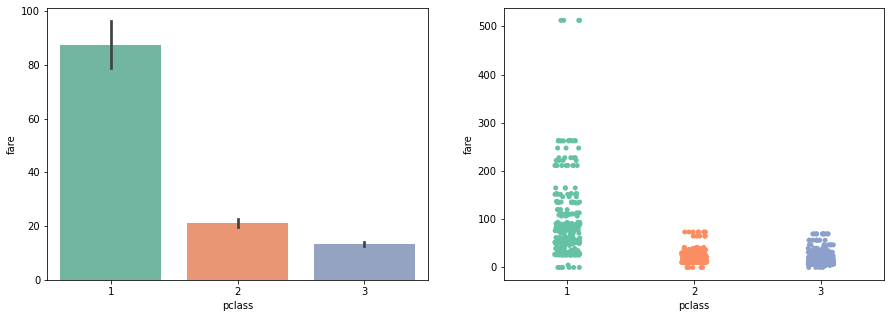

In [6]:
# 객실 등급별 평균 가격 및 가격 분포 확인
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5)) # 그래프 틀 생성
fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

sns.barplot(df['pclass'].astype('str'), df['fare'], palette='Set2', ax=ax[0])
sns.stripplot(df['pclass'].astype('str'), df['fare'], palette='Set2', ax=ax[1])

1등급 객실 운임 요금이 2-3등급에 비해 편차가 심한 편이며,   
1-3등급 객실 운임 요금이 서로 겹치는 부분이 다수 보인다는 점에서 운임 데이터의 신뢰성이 떨어진다.
>일반적으로 1-3등급 비용이 겹치도록 가격 편성을 하지 않을 것으로 예상되기 때문이다.

### 중복 티켓 개수 파악을 통한 운임료 수정

In [7]:
# 티켓이름별 중복 개수 파악해서 df에 넣기
ticket_count = {}
for t in df['ticket']:
    if t in ticket_count.keys():
        ticket_count[t] += 1
    else:
        ticket_count[t] = 1


df['t_count'] = df['ticket'].apply(lambda x: ticket_count[x])

# 티켓 가격 / 중복 티켓 수량
df['fare_one'] = df['fare'] / df['t_count']
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,t_count,fare_one
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4,52.834375
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",6,25.258333
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,2,7.227100
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,2,7.227100
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1,7.225000
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1,7.225000


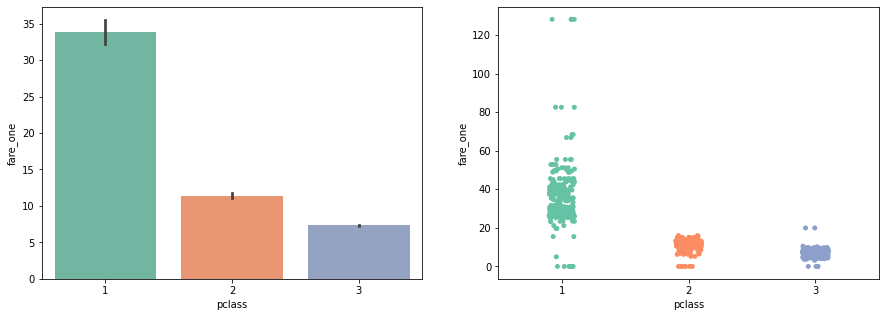

In [8]:
# 등급별 가격 및 분포 재확인
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5)) # 그래프 틀 생성
fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

sns.barplot(df['pclass'].astype('str'), df['fare_one'], palette='Set2', ax=ax[0])
sns.stripplot(df['pclass'].astype('str'), df['fare_one'], palette='Set2', ax=ax[1])
plt.show()

수정 후 1등급 평균 가격이 2-3등급과 비교했을 때 합리적으로 보이며,  
일부 데이터를 제외한 1-3등급 운임료에 구분선이 확인되어 해당 데이터가 등급별 인당 운임료로 적합하다고 판단

### 탑승자 연령대 구분하기
> 연령대별 특징을 파악하기 위해 10세 간격으로 구분

In [9]:
# age를 연령대로 구분
def age_split(age):
    if age < 10:
        return '0-9'
    elif (age >= 10) & (age < 20):
        return '10-19'
    elif (age >= 20) & (age < 30):
        return '20-29'
    elif (age >= 30) & (age < 40):
        return '30-39'
    elif (age >= 40) & (age < 50):
        return '40-49'
    elif (age >= 50) & (age < 60):
        return '50-59'
    elif (age >= 60) & (age < 70):
        return '60-69'
    elif (age >= 70):
        return 'over 70'
    
df['age_group'] = df['age'].apply(age_split)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,t_count,fare_one,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",4,52.834375,20-29
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,0-9
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,0-9
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",6,25.258333,30-39
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",6,25.258333,20-29


### 연령대 기준 객실 현황 및 생존비율

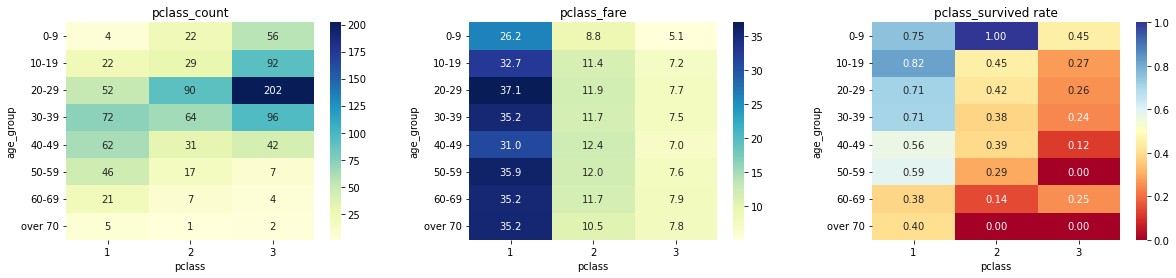

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 4)) # 그래프 틀 생성
plt.subplots_adjust(wspace=0.3, hspace=0.5)
fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

# 연령대, 등급별 객수 현황
tmp = df.groupby(['age_group', 'pclass'], as_index=False).count()[['age_group', 'pclass', 'survived']]
tmp = tmp.rename(columns={'survived': 'count'})
pivot = tmp.pivot('age_group', 'pclass', 'count')
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu', ax=ax[0])
ax[0].set_title('pclass_count')

# 연령대, 등급별 운임비 평균 지불 금액
tmp = df.groupby(['age_group', 'pclass'], as_index=False).mean()[['age_group', 'pclass', 'fare_one']]
pivot = tmp.pivot('age_group', 'pclass', 'fare_one')
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlGnBu', ax=ax[1])
ax[1].set_title('pclass_fare')

# 연령대, 등급별 객수 현황
tmp = df.groupby(['age_group', 'pclass'], as_index=False).mean()[['age_group', 'pclass', 'survived']]
pivot = tmp.pivot('age_group', 'pclass', 'survived')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlBu', ax=ax[2])
ax[2].set_title('pclass_survived rate')

plt.show()

등급별
1. 타이타닉호에 20대가 가장 많이 탑승하고 있는 것을 확인할 수 있다.  
2. 30대를 기준으로 낮은 연령일수록 낮은 등급을 구매했고, 고연령으로 갈수록 높은 등급을 구매했음이 확인된다.  

평균 운임비  
1. 1등급 35 2등급 11, 3등급 7 정도 수준으로 확인되며 영유아 할인이 적용되었을 것으로 예상된다.  

생존 비율
1. 높은 객실 등급을 구매한 탑승객의 생존율이 높았음을 확인할 수 있다.  
2. 30대 이하 연령층일수록 생존 비율이 높음을 확인할 수 있다.

### 연령별 가족 동승 현황 및 생존 비율

In [11]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 't_count',
       'fare_one', 'age_group'],
      dtype='object')

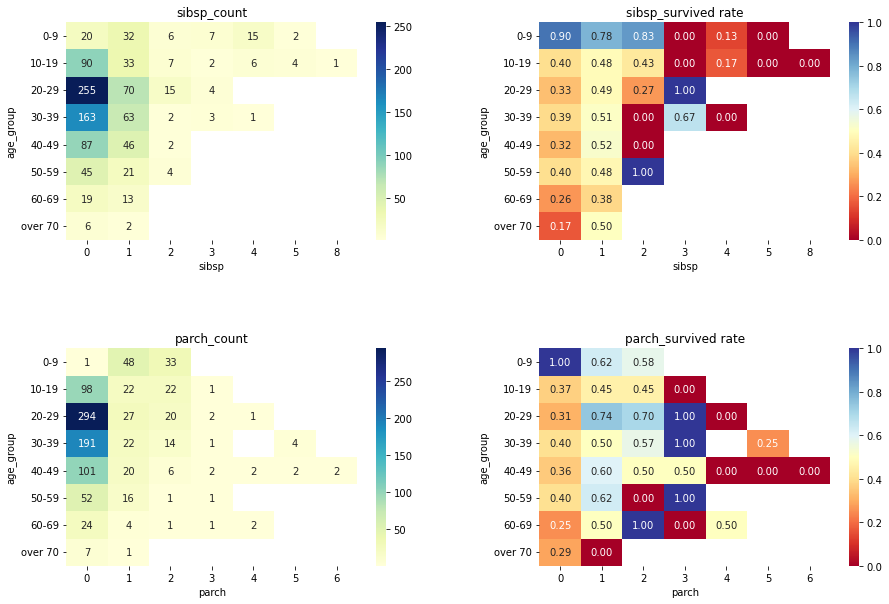

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10)) # 그래프 틀 생성
plt.subplots_adjust(wspace=0.3, hspace=0.5)
fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

# 연령대별 형제 또는 부부와 동승한 승객수
tmp = df.groupby(['sibsp', 'age_group'], as_index=False).count()[['sibsp', 'age_group', 'survived']]
tmp = tmp.rename(columns={'survived': 'count'})
pivot = tmp.pivot('age_group', 'sibsp', 'count')
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu', ax=ax[0, 0])
ax[0, 0].set_title("sibsp_count")

# 연령대별 부모 또는 자녀와 동승한 승객수
tmp = df.groupby(['parch', 'age_group'], as_index=False).count()[['parch', 'age_group', 'survived']]
tmp = tmp.rename(columns={'survived': 'count'})
pivot = tmp.pivot('age_group', 'parch', 'count')
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_title("parch_count")

# sibsp 생존 비율
tmp = df.groupby(['sibsp', 'age_group'], as_index=False).mean()[['sibsp', 'age_group', 'survived']]
pivot = tmp.pivot('age_group', 'sibsp', 'survived')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlBu', ax=ax[0, 1])
ax[0, 1].set_title("sibsp_survived rate")

# parch 생존 비율
tmp = df.groupby(['parch', 'age_group'], as_index=False).mean()[['parch', 'age_group', 'survived']]
pivot = tmp.pivot('age_group', 'parch', 'survived')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlBu', ax=ax[1, 1])
ax[1, 1].set_title("parch_survived rate")

plt.show()

1. 부모, 형제, 자녀없이 홀로 또는 지인과 동승한 승객수가 가장 높은 것으로 확인된다.  
2. 부모자녀, 부부 등 소규모 가족 단위의 생존율이 높은 것으로 확인되며 가족의 규모가 커질수록 생존율이 낮을 것으로 보인다.

### 성별 생존 비율

male      843
female    466
Name: sex, dtype: int64


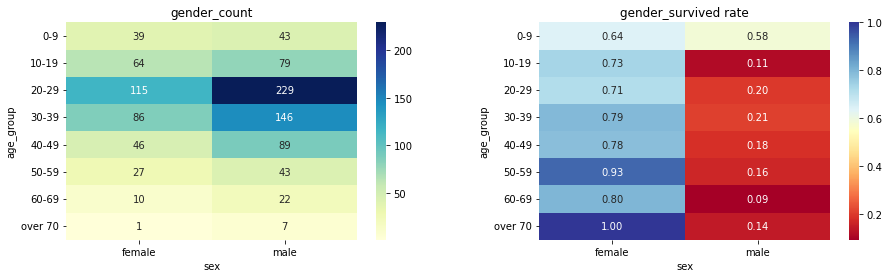

In [13]:
print(df['sex'].value_counts())

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4)) # 그래프 틀 생성
plt.subplots_adjust(wspace=0.3, hspace=0.5)
fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

# 연령대, 성별 객수 현황
tmp = df.groupby(['age_group', 'sex'], as_index=False).count()[['age_group', 'sex', 'survived']]
tmp = tmp.rename(columns={'survived': 'count'})
pivot = tmp.pivot('age_group', 'sex', 'count')
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu', ax=ax[0])
ax[0].set_title('gender_count')

# 연령대, 성별 생존 현황
tmp = df.groupby(['age_group', 'sex'], as_index=False).mean()[['age_group', 'sex', 'survived']]
pivot = tmp.pivot('age_group', 'sex', 'survived')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlBu', ax=ax[1])
ax[1].set_title('gender_survived rate')

plt.show()

전체 탑승객 중 남성의 비율이 64%이며 여성보다 약 1.8배 더 많이 탑승한 것으로 보인다.  
남성의 생존비율이 저연령층을 제외하고는 현저히 낮은 비율을 보이고 있다.

### 보트 탑승자 중 성별 비율 및 듭급별 생존 비율

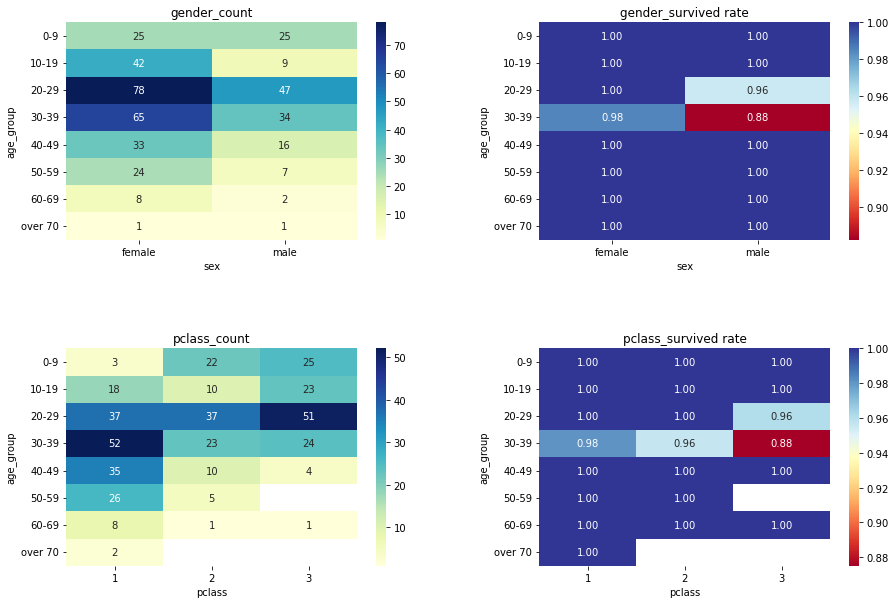

In [14]:
# 보트 탑승자
boat = df[df["boat"].notna()]


fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10)) # 그래프 틀 생성
plt.subplots_adjust(wspace=0.3, hspace=0.5)
fig.patch.set_facecolor('xkcd:white') # 그래프 흰색 배경 확장하기

# 연령대, 성별 객수 현황
tmp = boat.groupby(['age_group', 'sex'], as_index=False).count()[['age_group', 'sex', 'survived']]
tmp = tmp.rename(columns={'survived': 'count'})
pivot = tmp.pivot('age_group', 'sex', 'count')
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu', ax=ax[0, 0])
ax[0, 0].set_title('gender_count')


# 연령대, 성별 생존 현황
tmp = boat.groupby(['age_group', 'sex'], as_index=False).mean()[['age_group', 'sex', 'survived']]
pivot = tmp.pivot('age_group', 'sex', 'survived')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlBu', ax=ax[0, 1])
ax[0, 1].set_title('gender_survived rate')


# 연령대, 등급별 객수 현황
tmp = boat.groupby(['age_group', 'pclass'], as_index=False).count()[['age_group', 'pclass', 'survived']]
tmp = tmp.rename(columns={'survived': 'count'})
pivot = tmp.pivot('age_group', 'pclass', 'count')
sns.heatmap(pivot, annot=True, fmt='g', cmap='YlGnBu', ax=ax[1, 0])
ax[1, 0].set_title('pclass_count')


# 연령대, 등급 생존 현황
tmp = boat.groupby(['age_group', 'pclass'], as_index=False).mean()[['age_group', 'pclass', 'survived']]
pivot = tmp.pivot('age_group', 'pclass', 'survived')
sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlBu', ax=ax[1, 1])
ax[1, 1].set_title('pclass_survived rate')

plt.show()

보트를 탑승했음에도 생존하지 못한 경우가 있다.  
여성의 보트 탑승 비율이 남성보다 더 높다.  
1등급 승객이 2-3등급보다 보트에 탑승한 비율이 더 높은 것으로 보인다.

# 정리


타이타닉 호에 탑승한 승객 중 높은 생존 확률을 차지한 조건은  
1. 여성이어야 한다.
2. 소가족 단위로 탑승했어야 한다.
3. 1등급 객식을 구매했어야 한다.
4. 10대-30대 연령이어야 한다.

---